# Load Module&Dataset

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

%matplotlib inline

item_category_df = pd.read_csv("./item_categories.csv") # item_categories.csv 아이템 카테고리에 대한 정보
items_df = pd.read_csv("./items.csv") # items.csv 아이템/ 제품에 대한 정보
shops_df = pd.read_csv("./shops.csv")  # shops.csv 가게에 대한 정보

train_df = pd.read_csv("./sales_train_v2.csv") # sales_train_v2.csv 데일리한 매출 정보
sample_df = pd.read_csv("./sample_submission.csv")# test.csv 테스트 셋 

test_df = pd.read_csv("./test.csv") # sample_submission.csv 샘플(제출용) 한 달에 얼마나 팔릴지..

In [75]:
items_df.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


# Date Column을 ['Day','Month','Year'] 로 분할 (Date_df)

In [6]:
# 분할

date_df = pd.DataFrame(train_df["date"].str.split(".").tolist(),  columns = ['Day','Month','Year'])

# train_df['Month'] = train_df['date'].str.split('.').str[1]
# train_df['Day'] = train_df['date'].str.split('.').str[0]
# train_df['Year'] = train_df['date'].str.split('.').str[2]
# D = D.drop(['date'],axis=1)

# Weekday 연관성 파악

In [7]:
# Date_df + Train_df = Full_df
Full_df = pd.concat([train_df, date_df],axis= 1)

In [8]:
from datetime import datetime

# Function
make_weekday_function = lambda x: datetime.weekday(datetime.strptime(x,  "%d.%m.%Y"))
# Activate
Full_df['weekday'] = pd.DataFrame(list(map(make_weekday_function,Full_df['date'])))

# Sort (make 'weekday_str')
weekday_sort_dict = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
Full_df["weekday_str"] = Full_df.weekday.map(weekday_sort_dict)

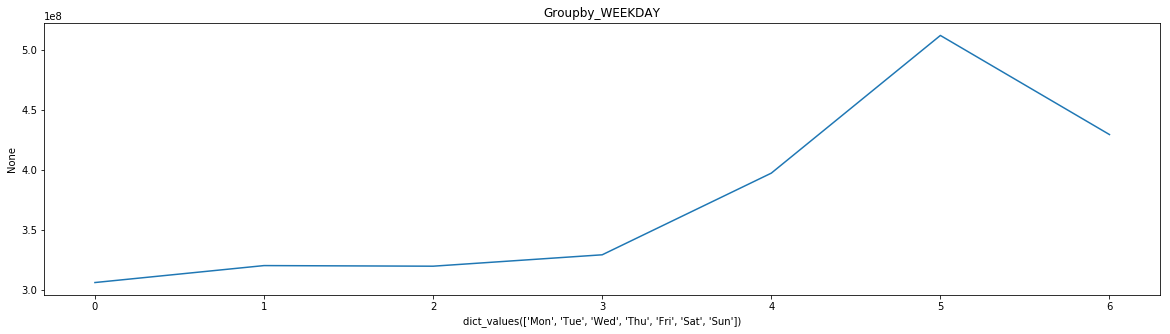

In [15]:
Weekday_test = Full_df.groupby(['weekday'])['item_price'].sum()


fig = plt.figure()
fig.set_size_inches(20,5)
ax_1 = fig.add_subplot(1,1,1)
ax_1.plot(Weekday_test.index, Weekday_test.values)
ax_1.set(xlabel= weekday_sort_dict.values(), ylabel=None,
       title='Groupby_WEEKDAY')
plt.show()

In [26]:
Full_df.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,Day,Month,Year,weekday,weekday_str
0,02.01.2013,0,59,22154,999.00,1.0,02,01,2013,2,Wed
1,03.01.2013,0,25,2552,899.00,1.0,03,01,2013,3,Thu
2,05.01.2013,0,25,2552,899.00,-1.0,05,01,2013,5,Sat
3,06.01.2013,0,25,2554,1709.05,1.0,06,01,2013,6,Sun
4,15.01.2013,0,25,2555,1099.00,1.0,15,01,2013,1,Tue


In [33]:
groupby =train_df.groupby(['shop_id','item_id'], as_index=False).item_cnt_day.sum()

Full_df.groupby(['date_block_num','weekday_str']).weekday_str.count()

date_block_num  weekday_str
0               Fri            15953
                Mon            11867
                Sat            20837
                Sun            18106
                Thu            17557
                Tue            13813
                Wed            17557
1               Fri            17306
                Mon            10550
                Sat            24160
                Sun            19392
                Thu            13479
                Tue            11504
                Wed            12222
2               Fri            20956
                Mon            10625
                Sat            28154
                Sun            22862
                Thu            14590
                Tue            11558
                Wed            12602
3               Fri            13082
                Mon            11683
                Sat            19662
                Sun            16440
                Thu            10718
          

In [63]:
import datetime
from datetime import datetime
import calendar
from calendar import Calendar
monday1 = 0
months = range(1,13)
for year in range(2015, 2017):
    for month in months:
        if datetime(year, month, 1).weekday() == 0:
            monday1 += 1
print(monday1)

3


In [62]:
pd.DataFrame(calendar.month(2010, 5))

ValueError: DataFrame constructor not properly called!

In [59]:
A

'      May 2010\nMo Tu We Th Fr Sa Su\n                1  2\n 3  4  5  6  7  8  9\n10 11 12 13 14 15 16\n17 18 19 20 21 22 23\n24 25 26 27 28 29 30\n31\n'

In [78]:
Calendar.itermonthdates(1,2015, 1)

<generator object Calendar.itermonthdates at 0x00000247803ED258>

In [79]:
A

<generator object Calendar.itermonthdates at 0x00000247803EDF68>

In [80]:
calendar.weekday(2015, (1–12), 1)

SyntaxError: invalid character in identifier (<ipython-input-80-5b4246ac79db>, line 1)

In [176]:
sample_df.shape, test_df.shape

((214200, 2), (214200, 3))

In [179]:
test_df.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [ ]:
merge(test_df,groupby)

In [193]:
pd.merge(test_df, groupby, how='left', on=['shop_id','item_id'])

,ID,shop_id,item_id,item_cnt_day
0,0,5,5037,13.0
1,1,5,5320,NaN
2,2,5,5233,10.0
3,3,5,5232,1.0
4,4,5,5268,NaN
5,5,5,5039,11.0
6,6,5,5041,5.0
7,7,5,5046,8.0
8,8,5,5319,63.0
9,9,5,5003,NaN


In [222]:
Just_Year = Full_df['Year'].unique()
Just_Month = Full_df['Month'].unique()

p=0
MAKE=[]
for Yidx,i in enumerate(Just_Year):
    for Midx,j in enumerate(Just_Month):
        if Midx == 11 and Yidx == 2:
            A = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[1,0,0,0,0,0,0])
            B = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[0,1,0,0,0,0,0]) 
            C = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[0,0,1,0,0,0,0]) 
            D = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[0,0,0,1,0,0,0]) 
            E = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[0,0,0,0,1,0,0]) 
            F = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[0,0,0,0,0,1,0]) 
            G = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[0,0,0,0,0,0,1]) 
            SSEM = len(np.arange(i+'-'+j, '2016'+'-'+'01', dtype='datetime64[D]'))
            H= Just_Year[Yidx]
            I= Just_Month[Midx]
            p = p+1
            print(p,Yidx,Midx)
            MAKE.append([H,I,A,B,C,D,E,F,G,SSEM])
        elif Midx != 11:
            A = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[1,0,0,0,0,0,0]) #“Mon Tue Wed Thu Fri"
            B = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[0,1,0,0,0,0,0]) 
            C = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[0,0,1,0,0,0,0]) 
            D = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[0,0,0,1,0,0,0]) 
            E = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[0,0,0,0,1,0,0]) 
            F = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[0,0,0,0,0,1,0]) 
            G = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[0,0,0,0,0,0,1]) 
            SSEM = len(np.arange(i+'-'+j, i+'-'+Just_Month[Midx+1], dtype='datetime64[D]'))
            H= Just_Year[Yidx]
            I= Just_Month[Midx]
            p = p+1
            print(p,Yidx,Midx)
            MAKE.append([H,I,A,B,C,D,E,F,G,SSEM])
        else :
            A = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[1,0,0,0,0,0,0])
            B = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[0,1,0,0,0,0,0]) 
            C = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[0,0,1,0,0,0,0]) 
            D = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[0,0,0,1,0,0,0]) 
            E = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[0,0,0,0,1,0,0]) 
            F = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[0,0,0,0,0,1,0]) 
            G = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[0,0,0,0,0,0,1]) 
            SSEM = len(np.arange(i+'-'+j, Just_Year[Yidx+1]+'-'+'01', dtype='datetime64[D]'))
            H= Just_Year[Yidx]
            I= Just_Month[Midx]
            p = p+1
            print(p,Yidx,Midx)
            MAKE.append([H,I,A,B,C,D,E,F,G,SSEM])

Target_Calendar = pd.DataFrame(MAKE, columns=['Year','Month','Mon_count','Tue_count','Wed_count','Thu_count','Fri_count','Sat_count','Sun_count','Day_Count'])

1 0 0
2 0 1
3 0 2
4 0 3
5 0 4
6 0 5
7 0 6
8 0 7
9 0 8
10 0 9
11 0 10
12 0 11
13 1 0
14 1 1
15 1 2
16 1 3
17 1 4
18 1 5
19 1 6
20 1 7
21 1 8
22 1 9
23 1 10
24 1 11
25 2 0
26 2 1
27 2 2
28 2 3
29 2 4
30 2 5
31 2 6
32 2 7
33 2 8
34 2 9
35 2 10
36 2 11


In [224]:
Target_Calendar 
# pickle 하기
Target_Calendar.to_pickle("Target_Calendar.pickle")

In [221]:
pd.DataFrame(MAKE, columns=['Year','Month','Mon_count','Tue_count','Wed_count','Thu_count','Fri_count','Sat_count','Sun_count','Day_Count'])

,Year,Month,Mon_count,Tue_count,Wed_count,Thu_count,Fri_count,Sat_count,Sun_count,Day_Count
0,2013,01,4,5,5,5,4,4,4,31
1,2013,02,4,4,4,4,4,4,4,28
2,2013,03,4,4,4,4,5,5,5,31
3,2013,04,5,5,4,4,4,4,4,30
4,2013,05,4,4,5,5,5,4,4,31
5,2013,06,4,4,4,4,4,5,5,30
6,2013,07,5,5,5,4,4,4,4,31
7,2013,08,4,4,4,5,5,5,4,31
8,2013,09,5,4,4,4,4,4,5,30
9,2013,10,4,5,5,5,4,4,4,31


In [210]:
p=0
for Yidx,i in enumerate(Just_Year):
    for Midx,j in enumerate(Just_Month):
        if Midx == 11 and Yidx == 2:
            MK_DF['Mon_count'][p] = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[1,0,0,0,0,0,0])
            MK_DF['Tue_count'][p] = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[0,1,0,0,0,0,0]) 
            MK_DF['Wed_count'][p] = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[0,0,1,0,0,0,0]) 
            MK_DF['Thu_count'][p] = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[0,0,0,1,0,0,0]) 
            MK_DF['Fri_count'][p] = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[0,0,0,0,1,0,0]) 
            MK_DF['Sat_count'][p] = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[0,0,0,0,0,1,0]) 
            MK_DF['Sun_count'][p] = np.busday_count(i+'-'+j, '2016'+'-'+'01',weekmask=[0,0,0,0,0,0,1]) 
#             MK_DF['Day_count'][p] = len(np.arange(i+'-'+j, '2016'+'-'+'01', dtype='datetime64[D]'))
            MK_DF['Year']= Just_Year[Yidx]
            MK_DF['Month']= Just_Month[Midx]
            p = p+1
            print(p,Yidx,Midx)
        elif Midx != 11:
            MK_DF['Mon_count'][p] = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[1,0,0,0,0,0,0]) #“Mon Tue Wed Thu Fri"
            MK_DF['Tue_count'][p] = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[0,1,0,0,0,0,0]) 
            MK_DF['Wed_count'][p] = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[0,0,1,0,0,0,0]) 
            MK_DF['Thu_count'][p] = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[0,0,0,1,0,0,0]) 
            MK_DF['Fri_count'][p] = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[0,0,0,0,1,0,0]) 
            MK_DF['Sat_count'][p] = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[0,0,0,0,0,1,0]) 
            MK_DF['Sun_count'][p] = np.busday_count(i+'-'+j, i+'-'+Just_Month[Midx+1],weekmask=[0,0,0,0,0,0,1]) 
#             MK_DF['Day_count'][p] = len(np.arange(i+'-'+j, i+'-'+Just_Month[Midx+1], dtype='datetime64[D]'))
            MK_DF['Year']= Just_Year[Yidx]
            MK_DF['Month']= Just_Month[Midx]
            p = p+1
            print(p,Yidx,Midx)
        else :
            MK_DF['Mon_count'][p] = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[1,0,0,0,0,0,0])
            MK_DF['Tue_count'][p] = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[0,1,0,0,0,0,0]) 
            MK_DF['Wed_count'][p] = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[0,0,1,0,0,0,0]) 
            MK_DF['Thu_count'][p] = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[0,0,0,1,0,0,0]) 
            MK_DF['Fri_count'][p] = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[0,0,0,0,1,0,0]) 
            MK_DF['Sat_count'][p] = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[0,0,0,0,0,1,0]) 
            MK_DF['Sun_count'][p] = np.busday_count(i+'-'+j, Just_Year[Yidx+1]+'-'+'01',weekmask=[0,0,0,0,0,0,1]) 
#             MK_DF['Day_count'][p] = len(np.arange(i+'-'+j, Just_Year[Yidx+1]+'-'+'01', dtype='datetime64[D]'))
            MK_DF['Year']= Just_Year[Yidx]
            MK_DF['Month']= Just_Month[Midx]
            p = p+1
            print(p,Yidx,Midx)
        
        
        

d:\programdata\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\programdata\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\programdata\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\programdata\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWar

1 0 0
2 0 1
3 0 2
4 0 3
5 0 4
6 0 5
7 0 6
8 0 7
9 0 8


d:\programdata\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\programdata\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\programdata\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\programdata\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:34: SettingWithCopyWar

10 0 9
11 0 10
12 0 11
13 1 0
14 1 1
15 1 2
16 1 3
17 1 4
18 1 5
19 1 6
20 1 7
21 1 8
22 1 9
23 1 10
24 1 11
25 2 0
26 2 1
27 2 2
28 2 3
29 2 4
30 2 5
31 2 6
32 2 7
33 2 8
34 2 9
35 2 10
36 2 11


d:\programdata\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
d:\programdata\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
d:\programdata\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
d:\programdata\miniconda3\envs\ml_python\lib\site-packages\ipykernel_launcher.py:7: SettingWithC

In [173]:
A = np.busday_count('2017-03', '2017-04',weekmask=[1,0,0,0,0,0,0])
B = np.busday_count('2017-03', '2017-04',weekmask=[0,1,0,0,0,0,0]) 
C = np.busday_count('2017-03', '2017-04',weekmask=[0,0,1,0,0,0,0]) 
D = np.busday_count('2017-03', '2017-04',weekmask=[0,0,0,1,0,0,0]) 
E = np.busday_count('2017-03', '2017-04',weekmask=[0,0,0,0,1,0,0]) 
F = np.busday_count('2017-03', '2017-04',weekmask=[0,0,0,0,0,1,0]) 
G = np.busday_count('2017-03', '2017-04',weekmask=[0,0,0,0,0,0,1]) 
H = len(np.arange('2017-03', '2017-04', dtype='datetime64[D]'))
A,B,C,D,E,F,G,H 

(4, 4, 5, 5, 5, 4, 4, 31)

In [119]:
Full_df.groupby(['Year','Month']).count().duplicated()

Year  Month
2013  01       False
      02       False
      03       False
      04       False
      05       False
      06       False
      07       False
      08       False
      09       False
      10       False
      11       False
      12       False
2014  01       False
      02       False
      03       False
      04       False
      05       False
      06       False
      07       False
      08       False
      09       False
      10       False
      11       False
      12       False
2015  01       False
      02       False
      03       False
      04       False
      05       False
      06       False
      07       False
      08       False
      09       False
      10       False
dtype: bool

0          False
1           True
2           True
3           True
4           True
5           True
6           True
7           True
8           True
9           True
10          True
11          True
12          True
13          True
14          True
15          True
16          True
17          True
18          True
19          True
20          True
21          True
22          True
23          True
24          True
25          True
26          True
27          True
28          True
29          True
           ...  
2935819     True
2935820     True
2935821     True
2935822     True
2935823     True
2935824     True
2935825     True
2935826     True
2935827     True
2935828     True
2935829     True
2935830     True
2935831     True
2935832     True
2935833     True
2935834     True
2935835     True
2935836     True
2935837     True
2935838     True
2935839     True
2935840     True
2935841     True
2935842     True
2935843     True
2935844     True
2935845     True
2935846     Tr

In [81]:
# Date Time

In [96]:
A = np.busday_count('2017-03', '2017-04',weekmask=[1,0,0,0,0,0,0])
B = np.busday_count('2017-03', '2017-04',weekmask=[0,1,0,0,0,0,0]) 
C = np.busday_count('2017-03', '2017-04',weekmask=[0,0,1,0,0,0,0]) 
D = np.busday_count('2017-03', '2017-04',weekmask=[0,0,0,1,0,0,0]) 
E = np.busday_count('2017-03', '2017-04',weekmask=[0,0,0,0,1,0,0]) 
F = np.busday_count('2017-03', '2017-04',weekmask=[0,0,0,0,0,1,0]) 
G = np.busday_count('2017-03', '2017-04',weekmask=[0,0,0,0,0,0,1]) 
H = len(np.arange('2017-03', '2017-04', dtype='datetime64[D]'))
A,B,C,D,E,F,G,H 

(4, 4, 5, 5, 5, 4, 4, 31)

In [98]:
A = np.busday_count('2017-04', '2017-05',weekmask=[1,0,0,0,0,0,0])
B = np.busday_count('2017-04', '2017-05',weekmask=[0,1,0,0,0,0,0]) 
C = np.busday_count('2017-04', '2017-05',weekmask=[0,0,1,0,0,0,0]) 
D = np.busday_count('2017-04', '2017-05',weekmask=[0,0,0,1,0,0,0]) 
E = np.busday_count('2017-04', '2017-05',weekmask=[0,0,0,0,1,0,0]) 
F = np.busday_count('2017-04', '2017-05',weekmask=[0,0,0,0,0,1,0]) 
G = np.busday_count('2017-04', '2017-05',weekmask=[0,0,0,0,0,0,1]) 
H = len(np.arange('2017-04', '2017-05', dtype='datetime64[D]'))
A,B,C,D,E,F,G,H 

(4, 4, 4, 4, 4, 5, 5, 30)

In [200]:
len(np.arange('2017-03', '2017-04', dtype='datetime64[D]'))

31

In [83]:
A = np.arange('2017-03', '2017-04', dtype='datetime64[D]')

array(['2017-03-01', '2017-03-02', '2017-03-03', '2017-03-04',
       '2017-03-05', '2017-03-06', '2017-03-07', '2017-03-08',
       '2017-03-09', '2017-03-10', '2017-03-11', '2017-03-12',
       '2017-03-13', '2017-03-14', '2017-03-15', '2017-03-16',
       '2017-03-17', '2017-03-18', '2017-03-19', '2017-03-20',
       '2017-03-21', '2017-03-22', '2017-03-23', '2017-03-24',
       '2017-03-25', '2017-03-26', '2017-03-27', '2017-03-28',
       '2017-03-29', '2017-03-30', '2017-03-31'], dtype='datetime64[D]')

In [86]:
np.busdaycalendar(A)

ValueError: Couldn't convert object into a business day weekmask

In [82]:
sample_df.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [181]:
p_df.shape

(424124, 34)

In [171]:
## Pivot by monht to wide format
p_df = train_df.pivot_table(index=['shop_id','item_id'], columns='date_block_num', values='item_cnt_day',aggfunc='sum').fillna(0.0)
p_df.head()

date_block_num    0     1    2    3    4    5    6    7    8    9  ...    24  \
shop_id item_id                                                    ...         
0       30       0.0  31.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
        31       0.0  11.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
        32       6.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
        33       3.0   3.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   
        35       1.0  14.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0 ...   0.0   

date_block_num    25   26   27   28   29   30   31   32   33  
shop_id item_id                                               
0       30       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        31       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        32       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        33       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
        35       0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 34 columns]

In [170]:
p_df.iloc[:,  (p_df.columns != 33)]
#.values

date_block_num     0     1    2    3    4     5     6    7     8    9  ...   \
shop_id item_id                                                        ...    
0       30        0.0  31.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        31        0.0  11.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        32        6.0  10.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        33        3.0   3.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        35        1.0  14.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        36        0.0   1.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        40        0.0   1.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        42        0.0   1.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        43        1.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        49        0.0   2.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        51        2.0   3.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        57        0.0   1.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        59        0.0   1.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        61        1.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        75        1.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        85        0.0   1.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        88        1.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        95        1.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        96        1.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        97        0.0   1.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        98       25.0   5.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        111       1.0   1.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        115       0.0   1.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        136       0.0   1.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        149       3.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        151       1.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        152       0.0   1.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        153       1.0   2.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        198       1.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        199       0.0   1.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
...               ...   ...  ...  ...  ...   ...   ...  ...   ...  ... ...    
59      22079     1.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        22087     9.0   1.0  6.0  0.0  2.0  17.0  12.0  7.0  10.0  5.0 ...    
        22088     5.0   0.0  5.0  3.0  6.0   8.0   7.0  4.0   4.0  0.0 ...    
        22091     0.0   0.0  1.0  0.0  2.0   0.0   7.0  2.0   0.0  0.0 ...    
        22092     2.0   0.0  5.0  2.0  5.0   0.0   2.0  3.0   5.0  7.0 ...    
        22100     0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        22102     0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        22104     0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        22105     0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        22106     0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        22114     0.0   0.0  0.0  0.0  1.0   0.0   0.0  0.0   0.0  0.0 ...    
        22115     0.0   0.0  0.0  0.0  1.0   0.0   0.0  0.0   0.0  0.0 ...    
        22118     0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        22126     0.0   0.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        22130     2.0   2.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        22132     0.0   0.0  0.0  0.0  0.0   0.0   1.0  1.0   0.0  0.0 ...    
        22134     2.0   1.0  0.0  0.0  0.0   0.0   0.0  0.0   0.0  0.0 ...    
        22139     0.0   0.0  0.0  0.0  0.0   0.0  

In [192]:
groupby =train_df.groupby(['shop_id','item_id'], as_index=False).item_cnt_day.sum()

In [115]:
train_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
5,10.01.2013,0,25,2564,349.00,1.0
6,02.01.2013,0,25,2565,549.00,1.0
7,04.01.2013,0,25,2572,239.00,1.0
8,11.01.2013,0,25,2572,299.00,1.0
9,03.01.2013,0,25,2573,299.00,3.0


In [108]:
test_df.groupby(['ID','shop_id','item_id']).count()

,,
ID,shop_id,item_id
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
5,5,5039
6,5,5041
7,5,5046
8,5,5319


In [107]:
test_df

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268
5,5,5,5039
6,6,5,5041
7,7,5,5046
8,8,5,5319
9,9,5,5003


In [7]:
df_new = pd.concat([train_df, date_df],axis= 1)

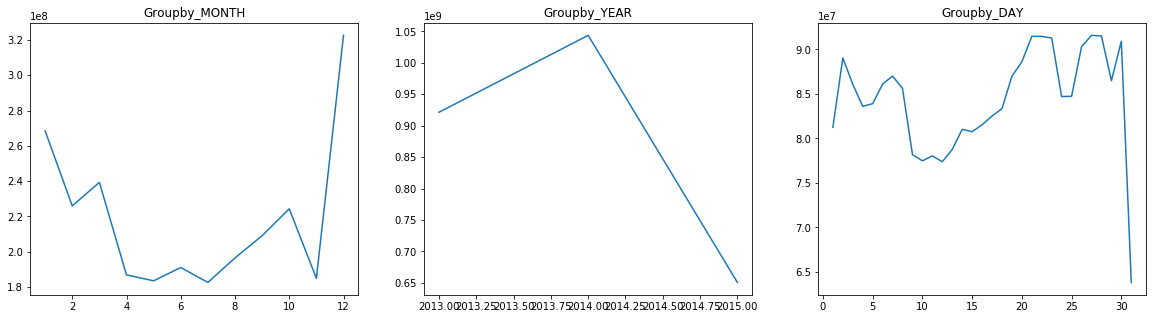

In [13]:
fig = plt.figure()
fig.set_size_inches(20,5)

Month_test = df_new.groupby(['Month'])['item_price'].sum()
Year_test = df_new.groupby(['Year'])['item_price'].sum()
Day_test = df_new.groupby(['Day'])['item_price'].sum()

ax_1 = fig.add_subplot(1,3,1)
ax_2 = fig.add_subplot(1,3,2)
ax_3 = fig.add_subplot(1,3,3)

ax_1.plot(Month_test.index, Month_test.values)
ax_2.plot(Year_test.index, Year_test.values)
ax_3.plot(Day_test.index, Day_test.values)

ax_1.set_title("Groupby_MONTH")
ax_2.set_title("Groupby_YEAR")
ax_3.set_title("Groupby_DAY")

plt.show()

In [ ]:
# --------------

In [ ]:
#-------------------

In [144]:
A = df_new.groupby(['shop_id','item_id'], as_index=False).item_cnt_day.sum().rename(columns={"item_cnt_day": "item_cnt_month"})

In [147]:
type(A)

pandas.core.frame.DataFrame

In [155]:
import os
def submission_df(shop_id_item_id_item_cnt_month_df):
    test_df = pd.read_csv("../input/test.csv.gz")
    sub_df = test_df.merge(shop_id_item_id_item_cnt_month_df, on=["shop_id", "item_id"], how="left")[["ID", "item_cnt_month"]]
    sub_df["item_cnt_month"] = sub_df.item_cnt_month.fillna(0).clip(0, 20)
    return sub_df


def create_submission_file(shop_id_item_id_item_cnt_day_df, submission_name="submission", add_timestamp=True):
    if add_timestamp:
        submission_name = "%s_%d" % (submission_name, time.time())

    path = os.path.abspath(os.path.join("./submissions/%s.csv" % submission_name))
    base_dir = os.path.dirname(path)
    if not os.path.exists(base_dir):
        os.makedirs(base_dir)
        
    sub_df = submission_df(shop_id_item_id_item_cnt_day_df)
    sub_df.to_csv(path, sep=",", index=False)

In [156]:
ls submissions/benchmarks/

매개 변수 포맷이 틀립니다 - "benchmarks".


In [158]:
A.to_csv("./previous_value_benchmark.csv", sep=",", index=False)

In [157]:
submission_name = "./SUBMISSION/previous_value_benchmark"
create_submission_file(A, submission_name, add_timestamp=False)

FileNotFoundError: [Errno 2] No such file or directory: '../input/test.csv.gz'

In [138]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

def parse_date(df):
    _df = df.copy()
    _df["date"] = pd.to_datetime(_df.date, format="%d.%m.%Y")
    return _df
def day_month_year(df):
    _df = df.copy()
    _df["day"] = _df.date.apply(lambda x: x.day)
    _df["month"] = _df.date.apply(lambda x: x.month)
    _df["year"] = _df.date.apply(lambda x: x.year)
    return _df

# Transformers
parse_date_transformer = FunctionTransformer(parse_date, validate=False)
# Pipelines
day_month_year_transformer = FunctionTransformer(day_month_year, validate=False)
date_pipeline = make_pipeline(parse_date_transformer, day_month_year_transformer)

# Main Pipeline
preprocessing_pipeline = make_pipeline(date_pipeline)

sales_df = preprocessing_pipeline.transform(pd.read_csv("./sales_train_v2.csv"))
test_df = pd.read_csv("./test.csv")

In [139]:
ind_previous_month = (sales_df.month == 10) & (sales_df.year == 2015)
sales_previous_month_df = sales_df[ind_previous_month].groupby(["shop_id", "item_id"], as_index=False).item_cnt_day.sum().rename(columns={"item_cnt_day": "item_cnt_month"})

In [141]:
sales_previous_month_df

,shop_id,item_id,item_cnt_month
0,2,31,1.0
1,2,486,3.0
2,2,787,1.0
3,2,794,1.0
4,2,968,1.0
5,2,988,1.0
6,2,1075,1.0
7,2,1121,1.0
8,2,1377,1.0
9,2,1387,1.0


In [ ]:
#----------------

In [119]:
Y_label = []
groupby_year_month.head()

Year  Month
2013  01       8.221187e+07
      02       7.558019e+07
      03       8.429831e+07
      04       6.151282e+07
      05       5.727413e+07
Name: item_price, dtype: float64

In [19]:
for i in range(len(K.index)):
    Y_label.append(K.index[i][0] + K.index[i][1])
    
groupby_year_month.head()

NameError: name 'K' is not defined

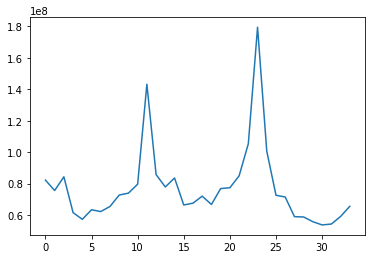

In [199]:
plt.plot( D['date_block_num'].unique(), A)

plt.show()

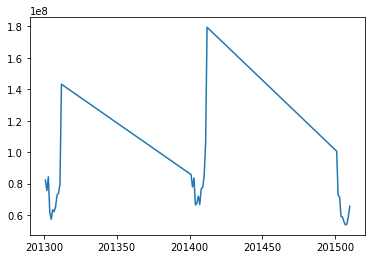

In [186]:
# fig = plt.figure()
# fig.set_size_inches(10,5)
# ax_1 = fig.add_subplot(1,2,1)
# ax_1.plot(K) # 추세를 보기 편함
month= []
# ax_1.set_title("House price MEDV")
plt.plot( Y_label, K)

plt.show()

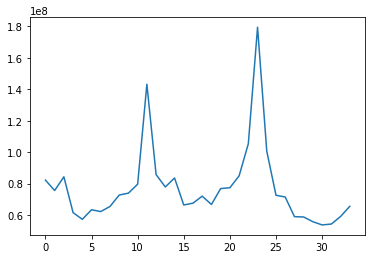

In [187]:
plt.plot( range(len(K)), K)

plt.show()

In [200]:
D.groupby(['shop_id'])['item_price'].sum()

shop_id
0     5.553869e+06
1     2.926161e+06
2     3.510444e+07
3     2.647262e+07
4     3.533539e+07
5     3.326088e+07
6     7.455831e+07
7     5.607710e+07
8     2.226273e+06
9     4.714303e+06
10    1.644284e+07
11    4.798425e+05
12    5.080559e+07
13    5.333601e+06
14    3.600645e+07
15    5.559759e+07
16    4.871298e+07
17    2.352167e+07
18    6.251643e+07
19    5.430200e+07
20    2.389266e+06
21    5.147937e+07
22    4.224514e+07
23    5.023142e+06
24    5.628828e+07
25    1.555576e+08
26    4.851612e+07
27    1.056489e+08
28    1.252947e+08
29    4.528771e+07
30    3.885892e+07
31    1.707634e+08
32    5.098652e+06
33    5.594080e+06
34    7.695497e+06
35    5.682312e+07
36    3.568190e+05
37    3.734868e+07
38    5.360325e+07
39    1.501239e+07
40    4.080156e+06
41    3.828370e+07
42    1.015515e+08
43    4.275150e+07
44    2.941958e+07
45    3.377880e+07
46    6.093469e+07
47    6.280522e+07
48    2.429822e+07
49    1.833824e+07
50    6.335695e+07
51    2.185559e+07
52  

In [204]:
A = D.groupby(['shop_id'])['item_price'].sum()

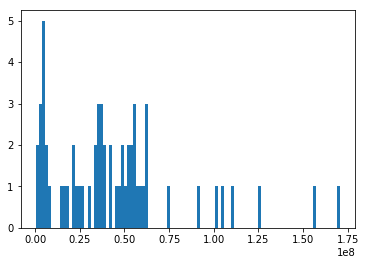

In [210]:
plt.hist( D.groupby(['shop_id'])['item_price'].sum(), bins=100)

plt.show()